# Chi-Square Test

In [9]:
# environmental variables, settings and imports
%run '000-env.ipynb'

<IPython.core.display.Javascript object>

---

The chi-square distribution can be used to find relationships between two things, like grocery prices at different stores. 

Supppose that you tossed a coin 100 times. Theoretically you would expect 50 tails and 50 heads, however it is pretty unlikely you get that result exactly. Then a question arises... how far off from you expected/theoretical frequency would you have to be in order to conclude that the observed result is statistically significant and is not just due to random variations.

We can begin to think about this question by defining an example set of possible events. We'll call them Events 1 through *k*. Each of these events has an expected (theoretical) frequency and an observed frequency. We can display this as a table:

<table>
<tr>
<th>Event</th>
<th>Event 1</th>
<th>Event 2</th>
<th>Event 3</th>
<th>...</th>
<th>Event k</th>
</tr>
<tr>
<td>Observed Frequency</td>
<td>$$o_1$$</td>
<td>$$o_2$$</td>
<td>$$o_3$$</td>
<td>...</td>
<td>$$o_k$$</td>
</tr>
<tr>
<td>Expected Frequency</td>
<td>$$e_1$$</td>
<td>$$e_2$$</td>
<td>$$e_3$$</td>
<td>...</td>
<td>$$e_k$$</td>
</tr>
</table>

Since we wanted to know whether observed frequencies differ significantly from the expected frequencies we'll have to define a term for a measure of discrepency.

We'll define this measure as Chi-Square, which will be the sum of the squared difference between the observed and expected frequency divided by the expected frequency for all events. To show this more clearly, this is mathematically written as:
$$ \chi ^2 =  \frac{(o_1 - e_1)^2}{e_1}+\frac{(o_2 - e_2)^2}{e_2}+...+\frac{(o_k - e_k)^2}{e_k} $$
Which is the same as:
$$\chi ^2 = \sum^{k}_{j=1} \frac{(o_j - e_j)^2}{e_j} $$

If the total frequency is N

$$ \sum o_j = \sum e_j = N $$

Then we could rewrite the Chi-Square Formula to be:
$$ \chi ^2 = \sum \frac{o_j ^2}{e_j ^2} - N$$

We can now see that if the Chi Square value is equal to zero, then the observed and theoretical frequencies agree exactly. While if the Chi square value is greater than zero, they do not agree.

The sampling distribution of Chi Square is approximated very closely by the *Chi-Square distribution*

### The Chi Square Distribution

The Chi-Square Distribution is related to the standard normal distribution. If a random variable Z, then Z<sup>2</sup> has the Chi Square distribution with one degree of freedom. This idea is best presented graphically in a video. I've embedded a video below which goes over this an a way better than this static iPython Notebook format.

Here is an excellent video explaining the basics of the Chi Square Distribution.

### The Chi Square Test for Goodness of Fit

We can now use the [Chi-Square test](http://stattrek.com/chi-square-test/goodness-of-fit.aspx?Tutorial=AP) can be used to determine how well a theoretical distribution fits an observed empirical distribution. 

Scipy will basically be constructing and looking up this table for us:


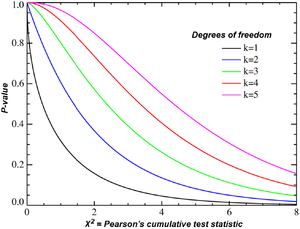

In [10]:
url='http://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Chi-square_distributionCDF-English.png/300px-Chi-square_distributionCDF-English.png'
Image(url)

.

## Resources

https://www.khanacademy.org/math/probability/statistics-inferential/chi-square/v/pearson-s-chi-square-test-goodness-of-fit

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chisquare.html

.

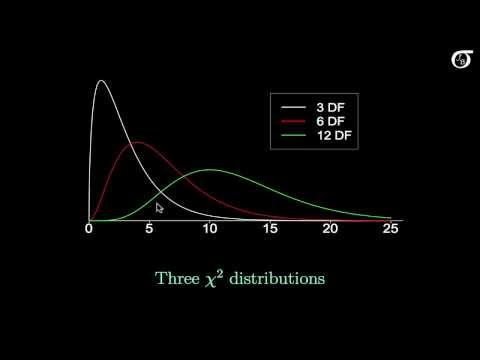

In [2]:
YouTubeVideo("hcDb12fsbBU")

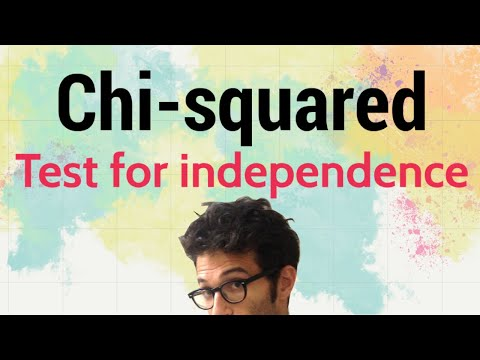

In [4]:
YouTubeVideo('NTHA9Qa81R8')

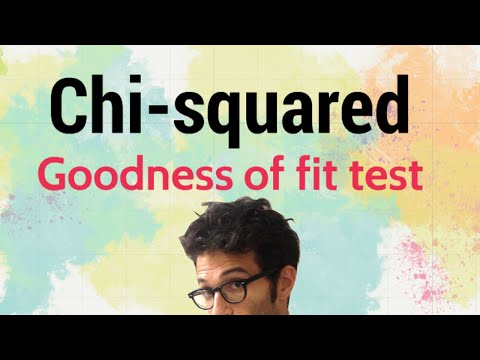

In [3]:
YouTubeVideo('ZNXso_riZag')

.

---

## Examples

<span style="font-size:large;color:blue">
If we flip a coin 18 times and observe that it comes up heads 12 times,<br/>
can we say that this is due to chance, or do we assume that our coin is biased?
</span>

In [20]:
dof = 2-1
alpha = 0.05
confidence = 1-alpha

In [23]:
# chi square critical value at 95% confidence with dof=1
chi_critical = stats.chi2.ppf(confidence, df=dof)
chi_critical

3.841458820694124

In [62]:
# expected tails and heads is 9 for each
# chi-square value with Scipy
chi = stats.chisquare([12,6],[9,9], ddof=dof, axis=0)
chi = chi.statistic
chi

2.0

our $\chi^2$ value is 2.0

In [63]:
chi > chi_critical

False

fails to reject $H_0$

..we cannot say with confidence that the coin is biased

.

<span style="font-size:large;color:blue;font-weight:bold">
Say you are at a casino and are in charge of monitoring a craps(a dice game where two dice are rolled). <br/>
You are suspcious that a player may have switched out the casino's dice for their own. 
</span>    <br/><br/>

<span style="font-size:large;color:blue;font-weight:normal">
How do we use the Chi-Square test to check whether or not this player is cheating?
</span>  <br/>

You will need some observations in order to begin. You begin to keep track of this player's roll outcomes. You record the next 500 rolls taking note of the sum of the dice roll result and the number of times it occurs.

You record the following:

<table>
<td>Sum of Dice Roll</td>
<td>2</td>
<td>3</td>
<td>4</td>
<td>5</td>
<td>6</td>
<td>7</td>
<td>8</td>
<td>9</td>
<td>10</td>
<td>11</td>
<td>12</td>
<tr>
<td>Number of Times Observed</td>
<td>8</td>
<td>32</td>
<td>48</td>
<td>59</td>
<td>67</td>
<td>84</td>
<td>76</td>
<td>57</td>
<td>34</td>
<td>28</td>
<td>7</td>
</tr>
</table>

Now we also know the espected frequency of these sums for a fair dice. That frequency distribution looks like this:

<table>
<td>Sum of Dice Roll</td>
<td>2</td>
<td>3</td>
<td>4</td>
<td>5</td>
<td>6</td>
<td>7</td>
<td>8</td>
<td>9</td>
<td>10</td>
<td>11</td>
<td>12</td>
</tr>
<tr>
<td>Expected Frequency</td>
<td>1/36</td>
<td>2/36</td>
<td>3/36</td>
<td>4/36</td>
<td>5/36</td>
<td>6/36</td>
<td>5/36</td>
<td>4/36</td>
<td>3/36</td>
<td>2/36</td>
<td>1/36</td>
</tr>
</table>

Now we can calculated the expected number of rolls by multiplying the expected frequency with the total sum of the rolls (500 rolls).

In [11]:
# Check sum of the rolls
observed = [8,32,48,59,67,84,76,57,34,28,7]
roll_sum = sum(observed)
roll_sum

500

In [12]:
# The expected frequency
freq = [1,2,3,4,5,6,5,4,3,2,1]

# Note use of float for python 2.7
possible_rolls = 1.0/36

freq = [possible_rolls*dice for dice in freq]

#Check
freq

[0.027777777777777776,
 0.05555555555555555,
 0.08333333333333333,
 0.1111111111111111,
 0.1388888888888889,
 0.16666666666666666,
 0.1388888888888889,
 0.1111111111111111,
 0.08333333333333333,
 0.05555555555555555,
 0.027777777777777776]

Excellent, now let's multiply our frequency by the sum to get the expected number of rolls for each frequency.

In [13]:
expected = [roll_sum*f for f in freq]
expected

[13.888888888888888,
 27.777777777777775,
 41.666666666666664,
 55.55555555555555,
 69.44444444444444,
 83.33333333333333,
 69.44444444444444,
 55.55555555555555,
 41.666666666666664,
 27.777777777777775,
 13.888888888888888]

We can now use Scipy to perform the [Chi Square Test](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chisquare.html) by using chisquare.

In [14]:
chisq,p = stats.chisquare(observed,expected)

print('The chi-squared test statistic is %.2f' %chisq)
print('The p-value for the test is %.2f' %p)

The chi-squared test statistic is 9.89
The p-value for the test is 0.45


stats.chisquare returns two values, the chi-squared test statistic and the p-value of the test.

With such a high p-value, we have no reason to doubt the fairness of the dice.

That's it for the Chi-Square Distirbution and Test!


.